# Support Vector Machines

### Importing necessary libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### Linear SVM Classification

#### Classifing 2 classes of the iris dataset using SVM classification

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [3]:
svm_clf.predict([[5, 2]])

array([1])

In [4]:
iris.target_names[1]

'versicolor'

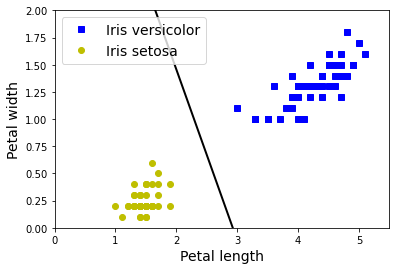

In [5]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])


w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
x0 = np.linspace(0, 5.5, 200)       ## generating x0 values between the axes limits of petal length
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
plt.plot(x0, decision_boundary, "k-", linewidth=2)

### Soft Margin Classification

#### Using the LinearSVM class to classify two classes of the iris dataset

In [6]:
from sklearn.pipeline import Pipeline

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [8]:
X = iris["data"][:, (2, 3)] ## petal length and width
y = (iris["target"] == 2).astype(np.float64)  ## Iris Virginica

In [9]:
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
        ])

In [10]:
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [11]:
svm_clf.predict([[5, 2]])

array([1.])

In [12]:
svm_clf.classes_

array([0., 1.])

### Nonlinear SVM Classification

#### Using polonomial features to make data linearly separable.
#### Using moons dataset to study its implementation

In [13]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [14]:
X, y = make_moons(n_samples=100, noise= 0.15) # spanning the dataset
polynomial_svm_clf = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=3)),
                    ("scaler", StandardScaler()),
                    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

In [15]:
polynomial_svm_clf.fit(X, y)

F:\Ana\envs\tf2\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

#### Implementing polynomial kernal

In [16]:
from sklearn.svm import SVC
poly_kernal_svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

In [17]:
poly_kernal_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

#### Implementing Gaussian RBF kernal SVM classification

In [18]:
rbf_kernal_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

In [19]:
rbf_kernal_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

### SVM Regression.

#### Implementing SVM Linear regression using sk-learn's LinearSVR class. Generating an example dataset for this task.

In [20]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [21]:
from sklearn.svm import LinearSVR

In [22]:
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [23]:
from sklearn.metrics import r2_score

In [24]:
y_pred = svm_reg.predict(X)

In [25]:
r2_eval = r2_score(y, y_pred)

In [26]:
r2_eval

0.7051280319442366

#### Implementing SVM NonLinear regression using sk-learn's SVR class. Generating an example dataset for this task.

In [27]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [28]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
y_pred = svm_reg.predict(X)
mse_eval = mean_squared_error(y, y_pred)
mse_eval

11.97443986553631